# KnapsackV2 - Group 3
1BM120, Assignment 2

Libraries:

In [1]:
import numpy as np
import or_gym
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
%matplotlib inline

## Exploring Knapsack

In [2]:
env = or_gym.make("Knapsack-v2") # Create an  instance of the environment 
env.mask = False

In [3]:
state = env.reset()
action_space = env.action_space.n
print('Action space', action_space, "\n")
for item in range(env.N):
    print("Item: {} \t ratio: {} \t reward: {} \t weight: {} \t limit: {}".format(item, round(state[1][item] / state[0][item],2), state[1][item], state[0][item], state[2][item]))

Action space 200 

Item: 0 	 ratio: 0.75 	 reward: 66 	 weight: 88 	 limit: 5
Item: 1 	 ratio: 0.11 	 reward: 9 	 weight: 80 	 limit: 5
Item: 2 	 ratio: 18.8 	 reward: 94 	 weight: 5 	 limit: 9
Item: 3 	 ratio: 0.56 	 reward: 42 	 weight: 75 	 limit: 9
Item: 4 	 ratio: 1.42 	 reward: 61 	 weight: 43 	 limit: 9
Item: 5 	 ratio: 0.2 	 reward: 8 	 weight: 41 	 limit: 6
Item: 6 	 ratio: 1.84 	 reward: 59 	 weight: 32 	 limit: 3
Item: 7 	 ratio: 0.04 	 reward: 4 	 weight: 90 	 limit: 4
Item: 8 	 ratio: 0.48 	 reward: 38 	 weight: 80 	 limit: 8
Item: 9 	 ratio: 0.08 	 reward: 4 	 weight: 52 	 limit: 3
Item: 10 	 ratio: 1.43 	 reward: 30 	 weight: 21 	 limit: 4
Item: 11 	 ratio: 0.11 	 reward: 2 	 weight: 19 	 limit: 5
Item: 12 	 ratio: 10.6 	 reward: 53 	 weight: 5 	 limit: 1
Item: 13 	 ratio: 0.38 	 reward: 30 	 weight: 78 	 limit: 3
Item: 14 	 ratio: 0.1 	 reward: 7 	 weight: 68 	 limit: 8
Item: 15 	 ratio: 11.38 	 reward: 91 	 weight: 8 	 limit: 2
Item: 16 	 ratio: 7.5 	 reward: 15 	 weig

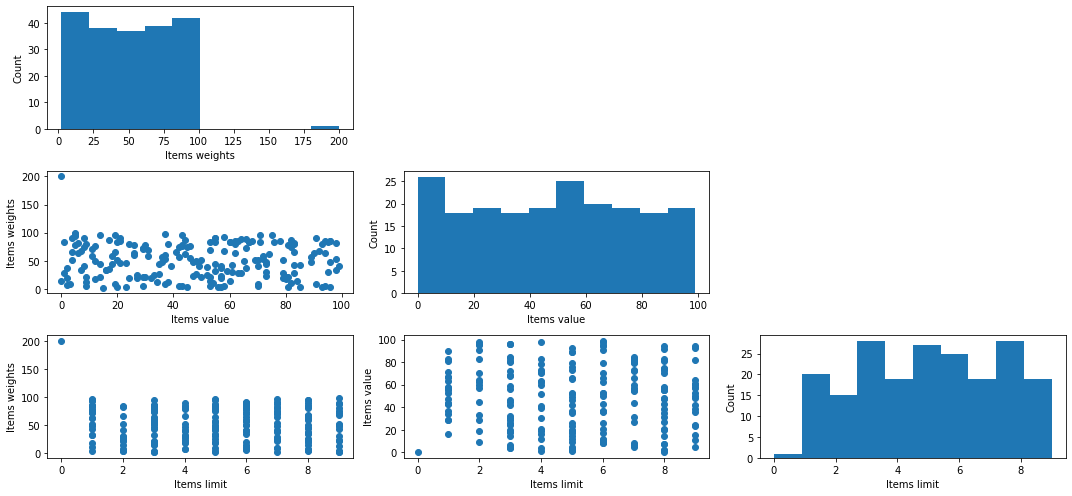

In [4]:
X = np.array([state[0], state[1], state[2]]).T
scatterplotmatrix(X, figsize=(15, 7), names = ["Items weights", "Items value", "Items limit"])
plt.tight_layout()
plt.show()

## Act in environment

In [5]:
for episode in range(2):
    state = env.reset()# get the starting state from the env.
    total_reward = 0; weight = 0; nr_items = 0
    done = False
    print("\nEPISODE ", episode)
    print("__________")
    for step in range(99): 
        action = env.action_space.sample() # is the index of the items list
        new_state, reward, done, info = env.step(action) #give the action to environment to obtain reward, and next state, 
        #print(new_state)
        p = env.observation_space["avail_actions"]
        print("Item {} with a reward of {}".format(action, reward))
        if done: # if the goal state is reached or bag is full. 
            print("\nItem {} exceeded the limit which has a weight of {}".format(action, new_state[0][action])) # Chosen a item that exceeds the capacity
            print("Total weight sack =\t", env.current_weight)
            print("Number of items =\t", nr_items)
            print("Total reward =\t", total_reward)        
            
            break
        nr_items += 1
        total_reward += reward
        state = new_state
        weight = state[0][action]
env.close()


EPISODE  0
__________
Item 69 with a reward of 48
Item 33 with a reward of 26
Item 10 with a reward of 30
Item 93 with a reward of 18
Item 53 with a reward of 0

Item 53 exceeded the limit which has a weight of 29
Total weight sack =	 193
Number of items =	 4
Total reward =	 122

EPISODE  1
__________
Item 170 with a reward of 92
Item 91 with a reward of 70
Item 71 with a reward of 57
Item 98 with a reward of 81
Item 124 with a reward of 0

Item 124 exceeded the limit which has a weight of 85
Total weight sack =	 125
Number of items =	 4
Total reward =	 300


## Model training 🧠

Import model and its functions

In [6]:
from dqn import train_dqn, test_dqn

C:\Users\20172458\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\20172458\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\20172458\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\20172458\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [9]:
def line_plot(data, title = "", subtitle = "", ylabel = "", file_name = "output", line_thick = 1):
    """
    LINEPLOTTER
    
    data: must be of type list, multilist or dictionary
    title: Title on the top of the figure (type = str)
    subtitle: Extra title (type = str)
    ylabel: Name of the ylabel (type = str)
    file_name: name of the file, saved in your current directory (type = str)
    line_thick: thickness of the lines
    """
    plt.figure(figsize=(15, 7)) # Figure size
    other_font = {'fontname': 'arial'} # Font type

    if isinstance(data, list):
        if isinstance(data[0], list): # Multilist
            i = 1
            for output in data:
                plt.plot(range(len(output)), output, linewidth = line_thick, label = "Scenario " + str(i))
                i += 1
        else: # List
            plt.plot(range(len(data)), data, linewidth = line_thick)
    
    elif isinstance(data, dict):
        for output, label in zip(list(data.values()), list(data.keys())):
            plt.plot(range(len(output)), output, linewidth = line_thick, label = label)
    else:
        print("{} are not allowed, only lists, multilists and dictionaries are allowed".format(type(data)))
    
    # Styling
    plt.ylabel(ylabel, fontsize = 16, ** other_font)
    plt.xlabel("Episodes", fontsize = 16, ** other_font)
    plt.title(title, loc='left', fontsize=20, fontweight = "bold", ** other_font)
    plt.title(subtitle, loc='right', fontsize=14, color='dimgray', ** other_font)
    plt.legend(loc = 2, edgecolor = 'white')
    plt.show()

Let's train

In [7]:
train_rewards = train_dqn(env)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
_________ n = 0 _________
Total training rewards: 70
Reward list = [5, 57, 8, 0]
item list = [86, 119, 24, 125]

Epsilon: 1.0 


The average reward over the last 100 episodes is
 70.0
_________ n = 1 _________
Total training rewards: 154
Reward list = [8, 36, 81, 14, 15, 0]
item list = [5, 190, 100, 193, 16, 168]

Epsilon: 0.9901493354116764 


The average reward over the last 100 episodes is
 112.0
_________ n = 2 _________
Total training rewards: 92
Reward list = [26, 66, 0]
item list = [21, 198, 88]

Epsilon: 0.9803966865736877 


The average reward over the last 100 episodes is
 105.33333333333333
_________ n = 3 _________
Total training rewards: 332
Reward list = [53, 38, 73, 91, 57, 20, 0]
item list = [50, 85, 192, 15, 94, 90, 14]

Epsilon: 0.970741078213023 


The average reward over the last 100 episodes is
 162.0
_________ n = 4 _________
Total training rewards

Epsilon: 0.6736168455752829 


The average reward over the last 100 episodes is
 198.4878048780488
_________ n = 41 _________
Total training rewards: 169
Reward list = [53, 89, 27, 0]
item list = [174, 73, 80, 175]

Epsilon: 0.6670137476349562 


The average reward over the last 100 episodes is
 197.78571428571428
_________ n = 42 _________
Total training rewards: 186
Reward list = [81, 62, 43, 0]
item list = [26, 30, 162, 61]

Epsilon: 0.6604763516169062 


The average reward over the last 100 episodes is
 197.51162790697674
_________ n = 43 _________
Total training rewards: 259
Reward list = [47, 89, 2, 89, 32, 0]
item list = [132, 73, 11, 73, 31, 77]

Epsilon: 0.6540040037760834 


The average reward over the last 100 episodes is
 198.9090909090909
_________ n = 44 _________
Total training rewards: 389
Reward list = [82, 57, 23, 42, 48, 57, 80, 0]
item list = [110, 105, 191, 77, 139, 119, 186, 32]

Epsilon: 0.64759605687231 


The average reward over the last 100 episodes is
 203.13

_________ n = 78 _________
Total training rewards: 351
Reward list = [47, 55, 1, 94, 94, 60, 0]
item list = [132, 19, 194, 2, 2, 51, 39]

Copying main network weights to the target network weights
Epsilon: 0.4638219511921713 


The average reward over the last 100 episodes is
 244.8860759493671
_________ n = 79 _________
Total training rewards: 430
Reward list = [70, 82, 82, 8, 94, 94, 0]
item list = [156, 110, 110, 181, 2, 2, 181]

Epsilon: 0.4593063473295323 


The average reward over the last 100 episodes is
 247.2
_________ n = 80 _________
Total training rewards: 379
Reward list = [98, 8, 98, 82, 93, 0]
item list = [60, 5, 60, 110, 67, 2]

Epsilon: 0.45483567447604933 


The average reward over the last 100 episodes is
 248.82716049382717
_________ n = 81 _________
Total training rewards: 649
Reward list = [70, 62, 73, 15, 94, 53, 94, 94, 94, 0]
item list = [91, 81, 146, 16, 2, 41, 2, 2, 2, 69]

Epsilon: 0.4504094855607117 


The average reward over the last 100 episodes is
 253.7

_________ n = 114 _________
Total training rewards: 138
Reward list = [83, 55, 0]
item list = [128, 116, 55]

Epsilon: 0.3266208315981408 


The average reward over the last 100 episodes is
 312.89
_________ n = 115 _________
Total training rewards: 252
Reward list = [64, 21, 82, 85, 0]
item list = [52, 68, 163, 141, 141]

Epsilon: 0.32347040168526264 


The average reward over the last 100 episodes is
 313.22
_________ n = 116 _________
Total training rewards: 16
Reward list = [16, 0]
item list = [108, 108]

Epsilon: 0.3203513190737793 


The average reward over the last 100 episodes is
 312.18
_________ n = 117 _________
Total training rewards: 401
Reward list = [81, 61, 14, 57, 94, 94, 0]
item list = [26, 62, 193, 119, 2, 2, 93]

Epsilon: 0.3172632718528302 


The average reward over the last 100 episodes is
 313.48
_________ n = 118 _________
Total training rewards: 446
Reward list = [70, 70, 79, 70, 41, 58, 58, 0]
item list = [156, 156, 22, 156, 109, 118, 118, 167]

Epsilon: 0.314

_________ n = 150 _________
Total training rewards: 650
Reward list = [96, 96, 96, 80, 94, 94, 94, 0]
item list = [111, 111, 111, 186, 2, 2, 2, 73]

Epsilon: 0.23089885854694553 


The average reward over the last 100 episodes is
 394.3
_________ n = 151 _________
Total training rewards: 311
Reward list = [55, 96, 80, 80, 0]
item list = [172, 111, 186, 186, 97]

Epsilon: 0.22870087817978443 


The average reward over the last 100 episodes is
 393.91
_________ n = 152 _________
Total training rewards: 737
Reward list = [89, 89, 89, 94, 94, 94, 94, 94, 0]
item list = [70, 70, 70, 2, 2, 2, 2, 2, 95]

Epsilon: 0.22652476808269262 


The average reward over the last 100 episodes is
 398.28
_________ n = 153 _________
Total training rewards: 385
Reward list = [58, 58, 81, 94, 94, 0]
item list = [117, 117, 100, 2, 2, 65]

Copying main network weights to the target network weights
Epsilon: 0.22437031064284702 


The average reward over the last 100 episodes is
 400.63
_________ n = 154 _______

_________ n = 185 _________
Total training rewards: 255
Reward list = [83, 83, 89, 0]
item list = [128, 128, 73, 128]

Epsilon: 0.16566479465049133 


The average reward over the last 100 episodes is
 487.89
_________ n = 186 _________
Total training rewards: 806
Reward list = [89, 89, 70, 93, 93, 93, 93, 93, 93, 0]
item list = [73, 73, 156, 133, 133, 133, 133, 133, 133, 172]

Epsilon: 0.16411590406431734 


The average reward over the last 100 episodes is
 493.33
_________ n = 187 _________
Total training rewards: 1149
Reward list = [89, 89, 94, 93, 93, 93, 93, 93, 93, 93, 93, 48, 85, 0]
item list = [73, 73, 2, 133, 133, 133, 133, 133, 133, 133, 133, 139, 141, 89]

Epsilon: 0.1625824251969801 


The average reward over the last 100 episodes is
 502.32
_________ n = 188 _________
Total training rewards: 925
Reward list = [94, 94, 79, 94, 94, 94, 94, 94, 94, 94, 0]
item list = [2, 2, 53, 2, 2, 2, 2, 2, 2, 2, 2]

Copying main network weights to the target network weights
Epsilon: 0.16106

_________ n = 215 _________
Total training rewards: 1274
Reward list = [12, 12, 44, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 85, 0]
item list = [38, 38, 155, 133, 133, 133, 133, 133, 133, 133, 2, 2, 2, 2, 2, 141, 137]

Epsilon: 0.125319316195762 


The average reward over the last 100 episodes is
 654.26
_________ n = 216 _________
Total training rewards: 1407
Reward list = [53, 69, 93, 93, 93, 93, 94, 94, 94, 94, 94, 85, 85, 94, 85, 94, 0]
item list = [50, 173, 133, 133, 133, 133, 2, 2, 2, 2, 2, 141, 141, 2, 141, 2, 39]

Epsilon: 0.12417186982768189 


The average reward over the last 100 episodes is
 668.17
_________ n = 217 _________
Total training rewards: 1225
Reward list = [96, 96, 96, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 0]
item list = [111, 111, 111, 133, 133, 133, 2, 2, 2, 2, 2, 2, 2, 7]

Epsilon: 0.12303584074172813 


The average reward over the last 100 episodes is
 676.41
_________ n = 218 _________
Total training rewards: 574
Reward list = [82, 82, 82, 82, 82, 8

_________ n = 244 _________
Total training rewards: 567
Reward list = [96, 96, 96, 93, 93, 93, 0]
item list = [111, 111, 111, 133, 133, 133, 194]

Epsilon: 0.09628924294736148 


The average reward over the last 100 episodes is
 854.55
_________ n = 245 _________
Total training rewards: 1075
Reward list = [53, 53, 37, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 0]
item list = [41, 41, 49, 133, 133, 133, 133, 133, 133, 133, 133, 2, 2, 164]

Epsilon: 0.09543065063437678 


The average reward over the last 100 episodes is
 852.43
_________ n = 246 _________
Total training rewards: 104
Reward list = [9, 95, 0]
item list = [1, 84, 54]

Epsilon: 0.09458060145764802 


The average reward over the last 100 episodes is
 845.08
_________ n = 247 _________
Total training rewards: 598
Reward list = [79, 79, 79, 79, 82, 60, 70, 70, 0]
item list = [53, 53, 53, 53, 110, 51, 156, 156, 168]

Epsilon: 0.09373901041154904 


The average reward over the last 100 episodes is
 847.28
_________ n = 248 _________

_________ n = 273 _________
Total training rewards: 574
Reward list = [82, 82, 82, 82, 82, 82, 82, 0]
item list = [110, 110, 110, 110, 110, 110, 110, 110]

Epsilon: 0.07456709677144624 


The average reward over the last 100 episodes is
 954.85
_________ n = 274 _________
Total training rewards: 1649
Reward list = [82, 82, 82, 94, 16, 94, 94, 19, 19, 19, 35, 93, 93, 93, 94, 94, 94, 85, 85, 94, 94, 94, 0]
item list = [110, 110, 110, 2, 29, 2, 2, 142, 142, 142, 44, 133, 133, 133, 2, 2, 2, 141, 141, 2, 2, 2, 177]

Epsilon: 0.07392464342423678 


The average reward over the last 100 episodes is
 969.38
_________ n = 275 _________
Total training rewards: 911
Reward list = [37, 37, 93, 93, 93, 93, 93, 93, 93, 93, 93, 0]
item list = [143, 143, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133]

Epsilon: 0.0732885825946405 


The average reward over the last 100 episodes is
 972.75
_________ n = 276 _________
Total training rewards: 1679
Reward list = [37, 37, 93, 93, 93, 93, 93, 93, 93, 93, 94

_________ n = 300 _________
Total training rewards: 2558
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 98, 98, 82, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 70, 70, 70, 85, 85, 85, 15, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 60, 60, 110, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 156, 156, 156, 141, 141, 141, 16, 16]

Epsilon: 0.05928919768418531 


The average reward over the last 100 episodes is
 1086.22
_________ n = 301 _________
Total training rewards: 903
Reward list = [94, 94, 94, 57, 94, 94, 94, 94, 94, 94, 0]
item list = [2, 2, 2, 105, 2, 2, 2, 2, 2, 2, 2]

Epsilon: 0.05879876197285753 


The average reward over the last 100 episodes is
 1087.3
_________ n = 302 _________
Total training rewards: 1958
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 98, 98, 70, 85, 93, 93, 93, 93, 93, 93, 89, 57, 57, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 60, 60, 156, 141, 133, 133, 133, 133, 133, 133, 70, 71, 71, 16]

Epsilon: 0.058313206178392835 


The average rew

_________ n = 324 _________
Total training rewards: 1600
Reward list = [98, 98, 98, 98, 93, 93, 93, 93, 93, 94, 94, 94, 94, 85, 94, 94, 94, 0]
item list = [60, 60, 60, 60, 133, 133, 133, 133, 133, 2, 2, 2, 2, 141, 2, 2, 2, 20]

Epsilon: 0.0487722561479972 


The average reward over the last 100 episodes is
 1203.89
_________ n = 325 _________
Total training rewards: 2400
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 98, 98, 85, 85, 70, 93, 93, 93, 93, 70, 85, 70, 70, 70, 70, 70, 70, 57, 57, 57, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 60, 60, 141, 141, 156, 133, 133, 133, 133, 156, 141, 156, 156, 156, 156, 156, 156, 71, 71, 71, 156]

Epsilon: 0.04838646575340479 


The average reward over the last 100 episodes is
 1222.31
_________ n = 326 _________
Total training rewards: 1929
Reward list = [79, 79, 79, 79, 70, 70, 93, 93, 93, 93, 93, 93, 93, 70, 94, 94, 94, 94, 94, 94, 94, 94, 0]
item list = [53, 53, 53, 53, 156, 156, 133, 133, 133, 133, 133, 133, 133, 156, 2, 2, 2, 2, 2, 2, 2

_________ n = 349 _________
Total training rewards: 44
Reward list = [44, 0]
item list = [148, 148]

Epsilon: 0.040195863449505306 


The average reward over the last 100 episodes is
 1325.61
_________ n = 350 _________
Total training rewards: 2404
Reward list = [43, 94, 94, 94, 94, 94, 94, 94, 85, 85, 93, 93, 93, 93, 93, 93, 85, 94, 94, 70, 70, 70, 57, 57, 57, 57, 57, 57, 93, 57, 0]
item list = [140, 2, 2, 2, 2, 2, 2, 2, 141, 141, 133, 133, 133, 133, 133, 133, 141, 2, 2, 156, 156, 156, 71, 71, 71, 71, 71, 71, 133, 71, 16]

Copying main network weights to the target network weights
Epsilon: 0.039895409588095315 


The average reward over the last 100 episodes is
 1343.9
_________ n = 351 _________
Total training rewards: 1045
Reward list = [82, 82, 82, 82, 82, 82, 82, 98, 43, 85, 94, 94, 57, 0]
item list = [110, 110, 110, 110, 110, 110, 110, 60, 140, 141, 2, 2, 71, 16]

Epsilon: 0.039597945292557044 


The average reward over the last 100 episodes is
 1353.15
_________ n = 352 ________

_________ n = 372 _________
Total training rewards: 3048
Reward list = [82, 82, 82, 82, 82, 82, 82, 94, 94, 94, 94, 94, 94, 94, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 70, 70, 94, 94, 57, 57, 57, 15, 0]
item list = [110, 110, 110, 110, 110, 110, 110, 2, 2, 2, 2, 2, 2, 2, 141, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 156, 156, 2, 2, 71, 71, 71, 16, 16]

Epsilon: 0.0339916281672342 


The average reward over the last 100 episodes is
 1518.04
_________ n = 373 _________
Total training rewards: 2609
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 98, 93, 93, 93, 93, 70, 70, 85, 85, 85, 57, 70, 57, 57, 57, 93, 15]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 60, 133, 133, 133, 133, 156, 156, 141, 141, 141, 71, 156, 71, 71, 71, 133, 16]

Copying main network weights to the target network weights
Epsilon: 0.03375290747834208 


The average reward over the last 100 episodes is
 1538.39
________

_________ n = 392 _________
Total training rewards: 1808
Reward list = [61, 61, 61, 61, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 85, 85, 85, 94, 0]
item list = [62, 62, 62, 62, 133, 133, 133, 133, 133, 133, 133, 2, 2, 2, 2, 2, 2, 141, 141, 141, 2, 16]

Epsilon: 0.029642683796926583 


The average reward over the last 100 episodes is
 1703.42
_________ n = 393 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 70, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 85, 70, 57, 57, 57, 57, 57, 57, 93, 57, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 156, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 141, 156, 71, 71, 71, 71, 71, 71, 133, 71, 16]

Epsilon: 0.02944723582753464 


The average reward over the last 100 episodes is
 1734.54
_________ n = 394 _________
Total training rewards: 3121
Reward list = [82, 82, 82, 82, 82, 82, 82, 94, 94, 94, 94, 94, 94, 94, 85, 85, 

_________ n = 413 _________
Total training rewards: 1194
Reward list = [66, 66, 93, 93, 94, 94, 94, 94, 94, 85, 85, 85, 94, 57, 0]
item list = [198, 198, 133, 133, 2, 2, 2, 2, 2, 141, 141, 141, 2, 71, 16]

Epsilon: 0.02592205003436255 


The average reward over the last 100 episodes is
 1830.78
_________ n = 414 _________
Total training rewards: 1143
Reward list = [66, 66, 93, 94, 94, 94, 94, 94, 94, 85, 85, 57, 57, 70, 0]
item list = [198, 198, 133, 2, 2, 2, 2, 2, 2, 141, 141, 71, 71, 156, 16]

Epsilon: 0.025763622989466578 


The average reward over the last 100 episodes is
 1833.8
_________ n = 415 _________
Total training rewards: 2300
Reward list = [94, 64, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 85, 94, 94, 94, 57, 57, 85, 85, 57, 57, 70, 0]
item list = [2, 83, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 2, 141, 2, 2, 2, 71, 71, 141, 141, 71, 71, 156, 16]

Epsilon: 0.025606772320005942 


The average reward over the last 100 episodes is
 1838.02
_____

_________ n = 433 _________
Total training rewards: 2666
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 85, 85, 85, 79, 79, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 70, 70, 57, 57, 57, 34, 15, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 141, 141, 141, 53, 53, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 156, 156, 71, 71, 71, 158, 16, 16]

Copying main network weights to the target network weights
Epsilon: 0.023035872015178954 


The average reward over the last 100 episodes is
 1969.35
_________ n = 434 _________
Total training rewards: 2031
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 79, 79, 89, 93, 70, 85, 85, 85, 70, 57, 57, 57, 57, 57, 57, 93, 15]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 53, 53, 70, 133, 156, 141, 141, 141, 156, 71, 71, 71, 71, 71, 71, 133, 16]

Epsilon: 0.022906162921403357 


The average reward over the last 100 episodes is
 1974.55
_________ n = 435 _________
Total training rewards: 2003
Reward list = [79, 79, 94, 94, 94, 72, 93, 9

_________ n = 452 _________
Total training rewards: 2441
Reward list = [79, 94, 94, 94, 94, 94, 94, 94, 94, 94, 85, 85, 79, 85, 61, 93, 93, 93, 93, 70, 70, 70, 70, 57, 57, 57, 57, 57, 57, 57, 70, 0]
item list = [53, 2, 2, 2, 2, 2, 2, 2, 2, 2, 141, 141, 176, 141, 62, 133, 133, 133, 133, 156, 156, 156, 156, 71, 71, 71, 71, 71, 71, 71, 156, 16]

Copying main network weights to the target network weights
Epsilon: 0.020780133431868894 


The average reward over the last 100 episodes is
 2131.71
_________ n = 453 _________
Total training rewards: 2347
Reward list = [57, 94, 94, 94, 94, 94, 94, 73, 82, 94, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 70, 94, 94, 70, 57]
item list = [119, 2, 2, 2, 2, 2, 2, 146, 110, 2, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 156, 2, 2, 156, 105]

Epsilon: 0.020672869312015653 


The average reward over the last 100 episodes is
 2123.39
_________ n = 454 _________
Total training rewards: 3121
Reward list = [82, 82, 82, 82, 82, 82, 82, 94,

_________ n = 472 _________
Total training rewards: 2530
Reward list = [94, 94, 94, 94, 79, 79, 79, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 85, 94, 94, 94, 94, 57, 57, 57, 57, 57, 70]
item list = [2, 2, 2, 2, 53, 53, 53, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 2, 141, 2, 2, 2, 2, 71, 71, 71, 71, 71, 156]

Epsilon: 0.01882602676295516 


The average reward over the last 100 episodes is
 2210.93
_________ n = 473 _________
Total training rewards: 55
Reward list = [55, 0]
item list = [19, 19]

Epsilon: 0.018738206329329453 


The average reward over the last 100 episodes is
 2185.39
_________ n = 474 _________
Total training rewards: 55
Reward list = [55, 0]
item list = [19, 19]

Epsilon: 0.018651259723618557 


The average reward over the last 100 episodes is
 2159.19
_________ n = 475 _________
Total training rewards: 55
Reward list = [55, 0]
item list = [19, 19]

Epsilon: 0.01856517825108943 


The average reward over the last 100 episodes is
 2139.7
_________ n 

_________ n = 494 _________
Total training rewards: 2758
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 98, 98, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 70, 70, 70, 57, 57, 57, 57, 57, 57, 57, 15, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 60, 60, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 156, 156, 156, 71, 71, 71, 71, 71, 71, 71, 16, 16]

Epsilon: 0.017083052388591435 


The average reward over the last 100 episodes is
 2182.9
_________ n = 495 _________
Total training rewards: 2302
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 98, 98, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 98, 70]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 60, 60, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 60, 156]

Copying main network weights to the target network weights
Epsilon: 0.017012574839761596 


The average reward over the last 100 episodes is
 2174.83
_________ n = 496 _________
Total training rewards: 3121
Reward list = [82, 82, 82, 82, 82, 82, 82,

_________ n = 514 _________
Total training rewards: 2601
Reward list = [82, 82, 82, 82, 82, 82, 82, 98, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 70, 94, 94, 94, 94, 94, 94, 94, 15, 0]
item list = [110, 110, 110, 110, 110, 110, 110, 60, 141, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 2, 156, 2, 2, 2, 2, 2, 2, 2, 16, 16]

Epsilon: 0.015799112816202266 


The average reward over the last 100 episodes is
 2232.48
_________ n = 515 _________
Total training rewards: 2756
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 98, 98, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 70, 70, 70, 57, 57, 85, 57, 57, 57, 57, 70, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 60, 60, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 156, 156, 156, 71, 71, 141, 71, 71, 71, 71, 156, 16]

Epsilon: 0.01574141067957372 


The average reward over the last 100 episodes is
 2237.04
_________ n = 516 _________
Total training rewards: 2756
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 98

_________ n = 533 _________
Total training rewards: 2758
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 98, 98, 85, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 70, 70, 70, 57, 57, 57, 57, 57, 57, 57, 93, 15, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 60, 60, 141, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 156, 156, 156, 71, 71, 71, 71, 71, 71, 71, 133, 16, 16]

Epsilon: 0.014795629312126479 


The average reward over the last 100 episodes is
 2275.04
_________ n = 534 _________
Total training rewards: 1347
Reward list = [94, 94, 66, 94, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 0]
item list = [2, 2, 0, 2, 141, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 37]

Epsilon: 0.014747912003193458 


The average reward over the last 100 episodes is
 2268.2
_________ n = 535 _________
Total training rewards: 1497
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 17, 85, 57, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 182, 141, 7

_________ n = 552 _________
Total training rewards: 2982
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 9, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 85, 70, 70, 70, 70, 70, 57, 57, 57, 57, 57, 57, 93, 15]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 144, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 141, 156, 156, 156, 156, 156, 71, 71, 71, 71, 71, 71, 133, 16]

Epsilon: 0.013965789462669513 


The average reward over the last 100 episodes is
 2305.91
_________ n = 553 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 70, 57, 57, 57, 57, 57, 57, 57, 70, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 156, 71, 71, 71, 71, 71, 71, 71, 156, 16]

Copying main network weights to the target network weights
Epsilon: 0.013926329198200155

_________ n = 569 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 70, 57, 57, 57, 57, 57, 57, 57, 70, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 156, 71, 71, 71, 71, 71, 71, 71, 156, 16]

Epsilon: 0.013345797039682946 


The average reward over the last 100 episodes is
 2426.78
_________ n = 570 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 70, 93, 93, 93, 93, 93, 93, 93, 93, 85, 70, 70, 70, 70, 57, 57, 57, 57, 57, 57, 57, 93, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 156, 133, 133, 133, 133, 133, 133, 133, 133, 141, 156, 156, 156, 156, 71, 71, 71, 71, 71, 71, 71, 133, 16]

Epsilon: 0.01331250580289656 


The average reward over the last 100 ep

_________ n = 587 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 70, 57, 57, 57, 57, 57, 57, 57, 70, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 156, 71, 71, 71, 71, 71, 71, 71, 156, 16]

Epsilon: 0.012794644600675184 


The average reward over the last 100 episodes is
 2592.37
_________ n = 588 _________
Total training rewards: 1200
Reward list = [79, 79, 79, 79, 93, 93, 93, 93, 93, 93, 93, 93, 93, 47]
item list = [53, 53, 53, 53, 133, 133, 133, 133, 133, 133, 133, 133, 133, 87]

Epsilon: 0.012766837422286476 


The average reward over the last 100 episodes is
 2576.79
_________ n = 589 _________
Total training rewards: 2520
Reward list = [94, 94, 94, 94, 94, 43, 94, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 94, 94, 94, 57, 57, 57, 57, 57, 57, 57, 

_________ n = 605 _________
Total training rewards: 2042
Reward list = [79, 79, 79, 79, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 70, 94, 94, 94, 85, 85, 94, 94, 94, 0]
item list = [53, 53, 53, 53, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 156, 2, 2, 2, 141, 141, 2, 2, 2, 16]

Epsilon: 0.01233428338642533 


The average reward over the last 100 episodes is
 2677.4
_________ n = 606 _________
Total training rewards: 772
Reward list = [95, 95, 70, 70, 57, 57, 57, 57, 57, 57, 85, 15]
item list = [112, 112, 156, 156, 71, 71, 71, 71, 71, 71, 141, 16]

Epsilon: 0.012311056878653841 


The average reward over the last 100 episodes is
 2659.4
_________ n = 607 _________
Total training rewards: 481
Reward list = [95, 95, 70, 70, 57, 94, 0]
item list = [112, 112, 156, 156, 71, 2, 190]

Epsilon: 0.012288061478496108 


The average reward over the last 100 episodes is
 2638.49
_________ n = 608 _________
Total training rewards: 2477
Reward list = [57, 57, 94, 94, 94, 94, 94, 85, 85, 93, 93, 

_________ n = 624 _________
Total training rewards: 2105
Reward list = [79, 94, 94, 94, 66, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 94, 94, 94, 85, 94, 85, 85, 70]
item list = [53, 2, 2, 2, 198, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 2, 2, 2, 141, 2, 141, 141, 156]

Epsilon: 0.01193035696761667 


The average reward over the last 100 episodes is
 2694.36
_________ n = 625 _________
Total training rewards: 2503
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 70, 70, 70, 70, 70, 70, 70, 70, 98, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 156, 156, 156, 156, 156, 156, 156, 156, 60, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 156]

Epsilon: 0.011911149594865432 


The average reward over the last 100 episodes is
 2691.49
_________ n = 626 _________
Total training rewards: 2500
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 0]
item list

_________ n = 643 _________
Total training rewards: 2700
Reward list = [82, 94, 94, 94, 94, 94, 94, 94, 94, 94, 98, 98, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 70, 57, 57, 57, 57, 57, 57, 57, 93, 15, 0]
item list = [110, 2, 2, 2, 2, 2, 2, 2, 2, 2, 60, 60, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 156, 71, 71, 71, 71, 71, 71, 71, 133, 16, 16]

Epsilon: 0.011596326326141817 


The average reward over the last 100 episodes is
 2687.4
_________ n = 644 _________
Total training rewards: 2302
Reward list = [94, 94, 94, 98, 98, 98, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 94, 94, 94, 94, 85, 85, 94, 94, 70]
item list = [2, 2, 2, 60, 60, 60, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 2, 2, 2, 2, 141, 141, 2, 2, 156]

Epsilon: 0.011580442613806126 


The average reward over the last 100 episodes is
 2685.67
_________ n = 645 _________
Total training rewards: 1378
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 98, 98, 70, 93, 31, 57, 85, 0]
item list = [2, 2, 2, 2, 2, 

_________ n = 663 _________
Total training rewards: 2756
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 98, 98, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 70, 70, 70, 57, 70, 57, 57, 57, 57, 57, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 60, 60, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 156, 156, 156, 71, 156, 71, 71, 71, 71, 71, 16]

Epsilon: 0.011306961455160297 


The average reward over the last 100 episodes is
 2544.01
_________ n = 664 _________
Total training rewards: 3121
Reward list = [82, 82, 82, 82, 82, 82, 82, 94, 94, 94, 94, 94, 94, 94, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 70, 70, 57, 57, 57, 57, 57, 57, 57, 70, 0]
item list = [110, 110, 110, 110, 110, 110, 110, 2, 2, 2, 2, 2, 2, 2, 141, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 2, 2, 156, 156, 71, 71, 71, 71, 71, 71, 71, 156, 16]

Epsilon: 0.011293956971398022 


The average reward over the last 100 episodes is
 2552.51
_________ n = 665 _________
Total training r

_________ n = 684 _________
Total training rewards: 2821
Reward list = [83, 83, 94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 70, 70, 70, 57, 57, 70, 57, 57, 57, 70, 0]
item list = [128, 128, 2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 156, 156, 156, 71, 71, 156, 71, 71, 71, 156, 16]

Epsilon: 0.011059402365643208 


The average reward over the last 100 episodes is
 2412.63
_________ n = 685 _________
Total training rewards: 1685
Reward list = [98, 98, 98, 98, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 85, 85, 93, 0]
item list = [60, 60, 60, 60, 133, 133, 133, 133, 2, 2, 2, 2, 2, 2, 2, 141, 141, 133, 16]

Epsilon: 0.011048861135978534 


The average reward over the last 100 episodes is
 2403.78
_________ n = 686 _________
Total training rewards: 895
Reward list = [61, 61, 61, 61, 93, 93, 93, 93, 93, 93, 93, 0]
item list = [62, 62, 62, 62, 133, 133, 133, 133, 133, 133, 133, 151]

Epsilon: 0.011038

_________ n = 704 _________
Total training rewards: 192
Reward list = [96, 96, 0]
item list = [113, 113, 113]

Epsilon: 0.010867365296635659 


The average reward over the last 100 episodes is
 2265.98
_________ n = 705 _________
Total training rewards: 192
Reward list = [96, 96, 0]
item list = [113, 113, 113]

Epsilon: 0.010858734867733933 


The average reward over the last 100 episodes is
 2247.48
_________ n = 706 _________
Total training rewards: 192
Reward list = [96, 96, 0]
item list = [113, 113, 113]

Epsilon: 0.010850190313034594 


The average reward over the last 100 episodes is
 2241.68
_________ n = 707 _________
Total training rewards: 2603
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 70, 70, 82, 82, 82, 82, 82, 85, 85, 70, 95, 85, 70, 70, 70, 70, 57, 57, 57, 57, 57, 57, 57, 93, 15, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 156, 156, 110, 110, 110, 110, 110, 141, 141, 156, 84, 141, 156, 156, 156, 156, 71, 71, 71, 71, 71, 71, 71, 133, 16, 16]

Copying main network w

_________ n = 725 _________
Total training rewards: 2853
Reward list = [83, 83, 94, 94, 94, 94, 94, 94, 94, 94, 94, 85, 85, 85, 70, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 70, 57, 57, 57, 57, 57, 57, 57, 0]
item list = [128, 128, 2, 2, 2, 2, 2, 2, 2, 2, 2, 141, 141, 141, 156, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 156, 71, 71, 71, 71, 71, 71, 71, 133]

Epsilon: 0.010703072644954124 


The average reward over the last 100 episodes is
 2225.37
_________ n = 726 _________
Total training rewards: 3121
Reward list = [94, 82, 82, 82, 82, 82, 82, 82, 94, 94, 94, 94, 94, 94, 70, 70, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 85, 85, 85, 57, 57, 57, 57, 57, 57, 57, 70, 0]
item list = [2, 110, 110, 110, 110, 110, 110, 110, 2, 2, 2, 2, 2, 2, 156, 156, 133, 133, 133, 133, 133, 133, 133, 133, 133, 2, 2, 141, 141, 141, 71, 71, 71, 71, 71, 71, 71, 156, 16]

Copying main network weights to the target network weights
Epsilon: 0.010696076955250418 


The average reward over

_________ n = 743 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 85, 85, 82, 82, 82, 82, 82, 82, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 57, 57, 57, 57, 57, 57, 57, 70, 70, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 141, 141, 110, 110, 110, 110, 110, 110, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 71, 71, 71, 71, 71, 71, 71, 156, 156, 16]

Epsilon: 0.010587255636788313 


The average reward over the last 100 episodes is
 2231.96
_________ n = 744 _________
Total training rewards: 1618
Reward list = [82, 82, 82, 94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 70, 70, 70, 70, 0]
item list = [110, 110, 110, 2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 57, 57, 57, 57, 57]

Copying main network weights to the target network weights
Epsilon: 0.01058141234557053 


The average reward over the last 100 episodes is
 2225.12
_________ n = 745 _________
Total training rewards: 2819
Reward list = [94, 94, 94, 94, 82, 82, 82,

_________ n = 761 _________
Total training rewards: 3182
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 85, 85, 85, 82, 82, 82, 82, 82, 70, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 57, 70, 57, 57, 57, 57, 57, 57, 70, 70, 70, 15, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 141, 141, 141, 110, 110, 110, 110, 110, 57, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 71, 156, 71, 71, 71, 71, 71, 71, 156, 156, 156, 16, 16]

Epsilon: 0.010490517139892635 


The average reward over the last 100 episodes is
 2343.83
_________ n = 762 _________
Total training rewards: 2866
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 57, 9, 57, 57, 70, 57, 57, 93, 57, 15]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 71, 144, 71, 71, 156, 71, 71, 133, 71, 16]

Epsilon: 0.010485636412801822 


The average reward over the last 100 episodes is
 2357.98
________

_________ n = 778 _________
Total training rewards: 3182
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 85, 85, 85, 82, 82, 82, 82, 82, 70, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 57, 57, 57, 57, 57, 70, 57, 57, 70, 15, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 141, 141, 141, 110, 110, 110, 110, 110, 57, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 71, 71, 71, 71, 71, 156, 71, 71, 156, 16, 16]

Epsilon: 0.010413832052864903 


The average reward over the last 100 episodes is
 2458.65
_________ n = 779 _________
Total training rewards: 3182
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 85, 85, 85, 82, 82, 82, 82, 82, 70, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 57, 57, 57, 57, 57, 70, 57, 57, 70, 15, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 141, 141, 141, 110, 110, 110, 110, 110, 57, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 71, 71, 71, 71, 71, 156, 71, 71, 156, 16, 16]

Copying main network weights to the target network weight

_________ n = 795 _________
Total training rewards: 3182
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 85, 85, 85, 82, 70, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 57, 70, 70, 57, 57, 57, 57, 70, 57, 70, 57, 15, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 141, 141, 141, 110, 57, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 71, 156, 156, 71, 71, 71, 71, 156, 71, 156, 71, 16, 16]

Epsilon: 0.010349135542981974 


The average reward over the last 100 episodes is
 2587.34
_________ n = 796 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 57, 57, 57, 57, 57, 57, 70, 57, 70, 70, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 71, 71, 71, 71, 71, 71, 156, 71, 156, 156, 16]

Copying main network weights to the target network weights
Epsil

_________ n = 814 _________
Total training rewards: 2894
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 85, 70, 70, 57, 57, 70, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 141, 156, 156, 71, 71, 156, 0]

Copying main network weights to the target network weights
Epsilon: 0.010288720826253218 


The average reward over the last 100 episodes is
 2653.97
_________ n = 815 _________
Total training rewards: 2464
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 31, 94, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 57, 70, 57, 57, 57, 57, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 79, 2, 141, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 71, 156, 71, 71, 71, 71, 132]

Epsilon: 0.010285848006031922 


The average reward over the last 100 episodes is
 2659.65
_________ n = 816 _________
Total trainin

_________ n = 832 _________
Total training rewards: 3056
Reward list = [94, 94, 94, 94, 94, 53, 94, 94, 94, 94, 85, 85, 85, 82, 82, 82, 70, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 57, 57, 70, 70, 57, 57, 70, 57, 57, 57, 70, 0]
item list = [2, 2, 2, 2, 2, 127, 2, 2, 2, 2, 141, 141, 141, 110, 110, 110, 57, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 71, 71, 156, 156, 71, 71, 156, 71, 71, 71, 156, 16]

Copying main network weights to the target network weights
Epsilon: 0.010241159905583363 


The average reward over the last 100 episodes is
 2689.89
_________ n = 833 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 85, 57, 57, 70, 57, 57, 70, 57, 57, 57, 70, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 141, 71, 71, 156, 71, 71, 156, 71, 71, 71, 156, 16]

Epsilon: 0.01023876032

_________ n = 849 _________
Total training rewards: 2923
Reward list = [83, 83, 94, 94, 94, 94, 94, 94, 94, 94, 94, 85, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 57, 57, 57, 57, 57, 57, 70, 57, 70, 70]
item list = [128, 128, 2, 2, 2, 2, 2, 2, 2, 2, 2, 141, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 71, 71, 71, 71, 71, 71, 156, 71, 156, 156]

Epsilon: 0.010203458127514388 


The average reward over the last 100 episodes is
 2759.8
_________ n = 850 _________
Total training rewards: 3182
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 85, 85, 85, 82, 82, 82, 82, 82, 70, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 57, 57, 57, 57, 70, 57, 57, 57, 70, 70, 70, 15, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 141, 141, 141, 110, 110, 110, 110, 110, 57, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 71, 71, 71, 71, 156, 71, 71, 71, 156, 156, 156, 16, 16]

Copying main network weights to the target network weights
Epsilon: 0.010201433685320538 


The ave

_________ n = 867 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 70, 57, 57, 70, 70, 57, 70, 70, 57, 57, 57, 57, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 156, 71, 71, 156, 156, 71, 156, 156, 71, 71, 71, 71, 16]

Copying main network weights to the target network weights
Epsilon: 0.010169942513182286 


The average reward over the last 100 episodes is
 2738.48
_________ n = 868 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 70, 57, 57, 57, 57, 57, 57, 57, 70, 70, 70, 70, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 156, 71, 71, 71, 71, 71, 71, 71, 156, 156, 156, 156, 16]

Epsilon: 0.0

_________ n = 883 _________
Total training rewards: 2724
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 37, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 70, 57, 57, 57, 57, 57, 57, 57, 70, 70, 70, 70, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 143, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 156, 71, 71, 71, 71, 71, 71, 71, 156, 156, 156, 156, 16]

Epsilon: 0.010144815457089593 


The average reward over the last 100 episodes is
 2777.96
_________ n = 884 _________
Total training rewards: 2971
Reward list = [94, 82, 82, 82, 60, 82, 82, 82, 82, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 85, 85, 57, 57, 57, 57, 57, 57, 57, 85, 93, 0]
item list = [2, 110, 110, 110, 51, 110, 110, 110, 110, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 2, 2, 2, 141, 141, 71, 71, 71, 71, 71, 71, 71, 141, 133, 16]

Epsilon: 0.010143374519215861 


The average reward over the last 100 episodes is
 2775.88
_________ n = 885 _________
Total training rewards: 1

_________ n = 902 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 70, 57, 57, 57, 57, 85, 70, 57, 57, 57, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 156, 71, 71, 71, 71, 141, 156, 71, 71, 71, 16]

Epsilon: 0.010119756464976423 


The average reward over the last 100 episodes is
 2737.29
_________ n = 903 _________
Total training rewards: 2954
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 9, 82, 82, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 70, 85, 57, 57, 57, 57, 57, 70, 70, 70, 57, 57, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 144, 110, 110, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 156, 141, 71, 71, 71, 71, 71, 156, 156, 156, 71, 71, 156]

Copying main network weights to the target network weights
Epsilon: 0.010118564868240294 

_________ n = 919 _________
Total training rewards: 2549
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 85, 85, 85, 82, 82, 82, 93, 93, 93, 93, 93, 93, 85, 70, 57, 93, 93, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 141, 141, 141, 110, 110, 110, 133, 133, 133, 133, 133, 133, 136, 156, 71, 133, 133, 16]

Copying main network weights to the target network weights
Epsilon: 0.010101034316060565 


The average reward over the last 100 episodes is
 2817.43
_________ n = 920 _________
Total training rewards: 3179
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 85, 57, 57, 57, 57, 57, 57, 70, 70, 57, 70, 70, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 141, 71, 71, 71, 71, 71, 71, 156, 156, 71, 156, 156, 16]

Epsilon: 0.010100029007818723 


The average reward over the last 100 episodes is
 2817.43
_____

_________ n = 936 _________
Total training rewards: 2348
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 85, 85, 85, 82, 82, 82, 82, 82, 93, 93, 93, 93, 93, 93, 93, 93, 93, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 141, 141, 141, 110, 110, 110, 110, 110, 133, 133, 133, 133, 133, 133, 133, 133, 133, 133]

Epsilon: 0.010085239097729176 


The average reward over the last 100 episodes is
 2797.81
_________ n = 937 _________
Total training rewards: 3150
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 82, 82, 82, 82, 82, 82, 85, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 70, 70, 70, 57, 70, 70, 85, 57, 57, 57, 57, 15]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 110, 110, 110, 110, 110, 110, 141, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 156, 156, 156, 71, 156, 156, 141, 71, 71, 71, 71, 16]

Epsilon: 0.0100843909545357 


The average reward over the last 100 episodes is
 2797.52
_________ n = 938 _________
Total training rewards: 3237
Reward list = [94, 94, 94, 94, 94, 94, 9

_________ n = 955 _________
Total training rewards: 2753
Reward list = [63, 63, 94, 94, 94, 94, 94, 94, 94, 94, 94, 85, 93, 93, 93, 93, 93, 93, 93, 93, 93, 70, 85, 85, 70, 70, 70, 70, 70, 70, 70, 57, 57, 15, 0]
item list = [48, 48, 2, 2, 2, 2, 2, 2, 2, 2, 2, 141, 133, 133, 133, 133, 133, 133, 133, 133, 133, 156, 141, 141, 156, 156, 156, 156, 156, 156, 156, 71, 71, 16, 16]

Epsilon: 0.010070489250436234 


The average reward over the last 100 episodes is
 2701.68
_________ n = 956 _________
Total training rewards: 2680
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 63, 63, 82, 93, 93, 93, 93, 93, 93, 93, 93, 85, 93, 70, 70, 70, 70, 70, 70, 85, 70, 57, 57, 15]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 48, 48, 110, 133, 133, 133, 133, 133, 133, 133, 133, 141, 133, 156, 156, 156, 156, 156, 156, 141, 156, 71, 71, 16]

Epsilon: 0.010069787870675497 


The average reward over the last 100 episodes is
 2717.0
_________ n = 957 _________
Total training rewards: 2471
Reward list = [94, 94, 94,

_________ n = 972 _________
Total training rewards: 2783
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 82, 70, 70, 70, 70, 2, 57, 57, 57, 57, 57, 57, 57, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 110, 156, 156, 156, 156, 130, 71, 71, 71, 71, 71, 71, 71, 23]

Copying main network weights to the target network weights
Epsilon: 0.010059469300541302 


The average reward over the last 100 episodes is
 2727.23
_________ n = 973 _________
Total training rewards: 3061
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 82, 70, 70, 70, 70, 70, 70, 70, 70, 57, 57, 57, 57, 57, 57, 57, 0]
item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 110, 156, 156, 156, 156, 156, 156, 156, 156, 71, 71, 71, 71, 71, 71, 71, 71]

Epsilon: 0.010058877571114096 


The average reward over t

_________ n = 988 _________
Total training rewards: 3114
Reward list = [93, 93, 93, 93, 94, 94, 94, 94, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 85, 85, 85, 82, 70, 70, 70, 70, 70, 70, 70, 57, 57, 57, 57, 57, 70, 57, 15, 15, 15, 15, 15, 15, 15, 57, 15, 15, 0]
item list = [133, 133, 133, 133, 2, 2, 2, 2, 133, 133, 133, 133, 133, 2, 2, 2, 2, 2, 141, 141, 141, 110, 156, 156, 156, 156, 156, 156, 156, 71, 71, 71, 71, 71, 156, 71, 16, 16, 16, 16, 16, 16, 16, 71, 16, 16, 16]

Epsilon: 0.010050676395090436 


The average reward over the last 100 episodes is
 2763.97
_________ n = 989 _________
Total training rewards: 3218
Reward list = [93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 82, 82, 82, 70, 70, 85, 85, 70, 85, 57, 57, 57, 57, 57, 57, 57, 70, 70, 70, 70, 70, 15, 15, 15, 15, 15, 0]
item list = [133, 133, 133, 133, 133, 2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 110, 110, 110, 156, 156, 141, 141, 156, 141, 71, 71, 71, 71, 71, 71, 71, 156, 156, 156, 156, 156, 16

Rewards visualized:

No handles with labels found to put in legend.


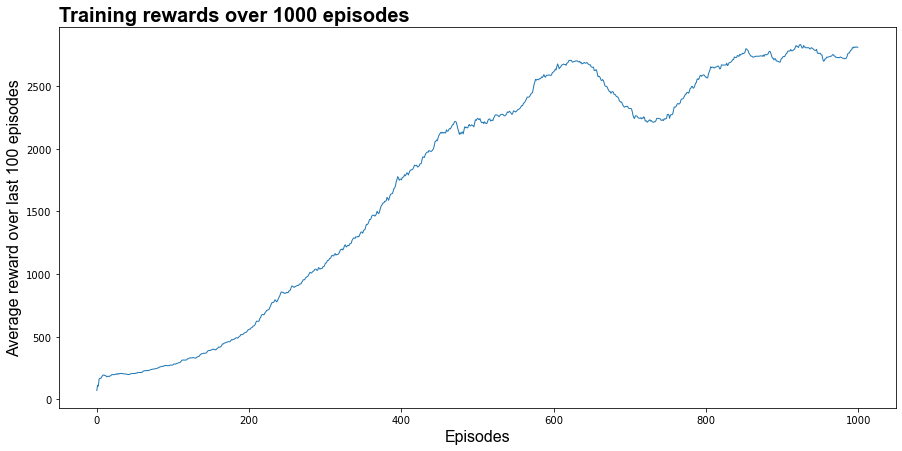

In [10]:
line_plot(train_rewards, 
          title = "Training rewards over 1000 episodes",
         ylabel = "Average reward over last 100 episodes"
         )

Test trained model for 100 episodes:

In [14]:
test_rewards = test_dqn(env)

_________ n = 0 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 156, 156, 156, 156, 71, 71, 156, 71, 71, 71, 71, 71, 71]

_________ n = 1 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 156, 156, 156, 156, 71, 71, 156, 71, 71, 71, 71, 71, 71]

_________ n = 2 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133,

_________ n = 23 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 156, 156, 156, 156, 71, 71, 156, 71, 71, 71, 71, 71, 71]

_________ n = 24 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 156, 156, 156, 156, 71, 71, 156, 71, 71, 71, 71, 71, 71]

_________ n = 25 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 1

_________ n = 47 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 156, 156, 156, 156, 71, 71, 156, 71, 71, 71, 71, 71, 71]

_________ n = 48 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 156, 156, 156, 156, 71, 71, 156, 71, 71, 71, 71, 71, 71]

_________ n = 49 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 1

_________ n = 71 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 156, 156, 156, 156, 71, 71, 156, 71, 71, 71, 71, 71, 71]

_________ n = 72 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 156, 156, 156, 156, 71, 71, 156, 71, 71, 71, 71, 71, 71]

_________ n = 73 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 1

_________ n = 95 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 156, 156, 156, 156, 71, 71, 156, 71, 71, 71, 71, 71, 71]

_________ n = 96 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 133, 133, 133, 133, 133, 133, 141, 141, 141, 110, 156, 156, 156, 156, 71, 71, 156, 71, 71, 71, 71, 71, 71]

_________ n = 97 _________
Total test rewards: 2769
Reward list = [94, 94, 94, 94, 94, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 93, 93, 93, 85, 85, 85, 82, 70, 70, 70, 70, 57, 57, 70, 57, 57, 57, 57, 57, 0]
Item list = [2, 2, 2, 2, 2, 2, 2, 2, 2, 133, 133, 133, 1

In [18]:
print("Average reward over 1000 episodes is", int(sum(rewards) / len(rewards)))

Average reward over 1000 episodes is 2769


No handles with labels found to put in legend.


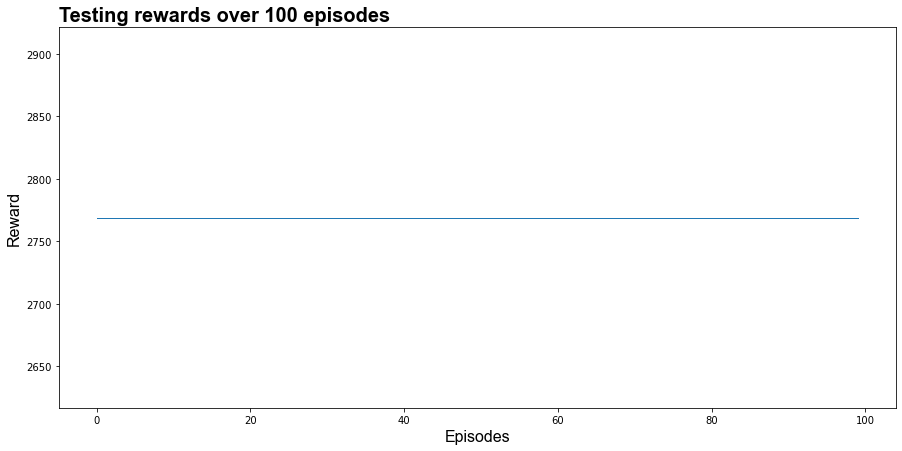

In [16]:
line_plot(test_rewards, 
          title = "Testing rewards over 100 episodes",
         ylabel = "Reward"
         )